In [14]:
#Pola Gnana Shekar
#21CS10052

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx')
print(df.shape) 

(2500, 13)


In [3]:
import pandas as pd

data_path = "../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(data_path)

columns_list = df.columns.tolist()
print("Columns in the dataset:", columns_list)

Columns in the dataset: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']


In [4]:
import pandas as pd

data_path = "../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(data_path)

unique_classes = df['Class'].unique()
print("Unique values in the 'Class' column:", unique_classes)

Unique values in the 'Class' column: ['Çerçevelik' 'Ürgüp Sivrisi']


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
data_path = "../../dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx"
df = pd.read_excel(data_path)

# Map 'Class' values to 1 and 0
class_mapping = {'Çerçevelik': 1, 'Ürgüp Sivrisi': 0}
df['Class'] = df['Class'].map(class_mapping)

# Assuming other columns are features
X = df.drop(columns=['Class'])
y = df['Class']

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Normalize/Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Implement Logistic Regression Classifier
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    intercept = np.ones((num_samples, 1))
    X = np.concatenate((intercept, X), axis=1)
    weights = np.zeros(num_features + 1)

    for epoch in range(num_epochs):
        y_pred = predict(X, weights)
        gradient = np.dot(X.T, (y_pred - y)) / num_samples
        weights -= learning_rate * gradient

    return weights

learning_rate = 0.01
num_epochs = 1000
weights = logistic_regression(X_train, y_train, learning_rate, num_epochs)

# Make predictions on the validation set
X_val_intercept = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
y_val_pred = predict(X_val_intercept, weights)
y_val_pred_class = np.round(y_val_pred)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred_class)
precision = precision_score(y_val, y_val_pred_class)
recall = recall_score(y_val, y_val_pred_class)

print("Mean Accuracy:", accuracy)
print("Precision for class 1:", precision)
print("Recall for class 1:", recall)


Mean Accuracy: 0.8586666666666667
Precision for class 1: 0.8521303258145363
Recall for class 1: 0.8785529715762274


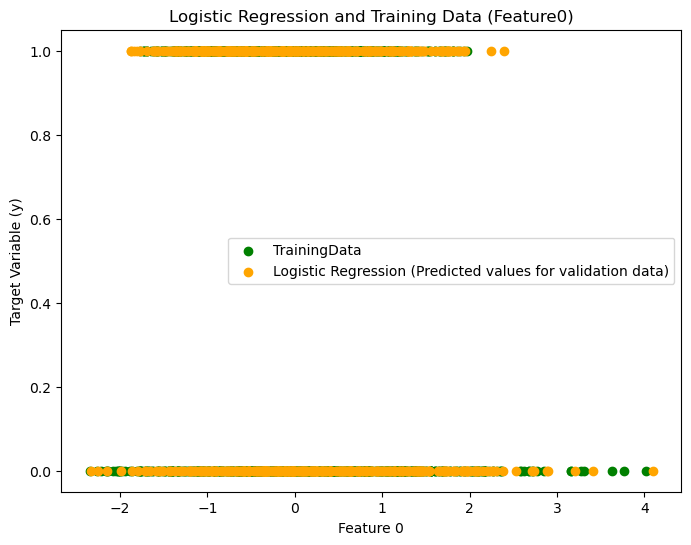

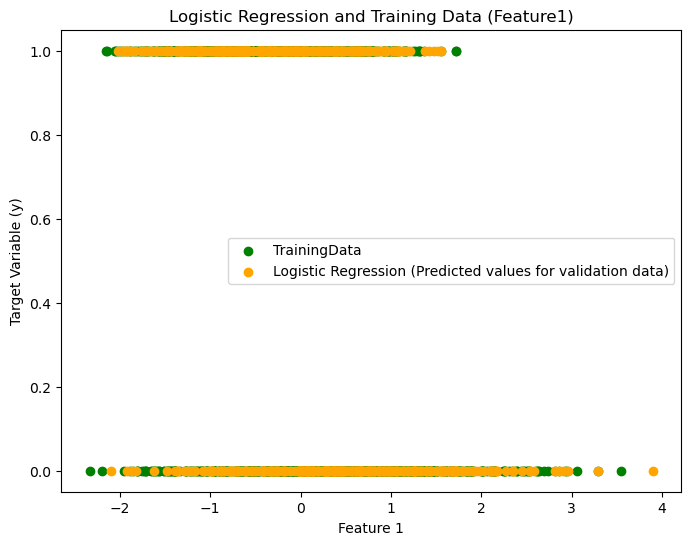

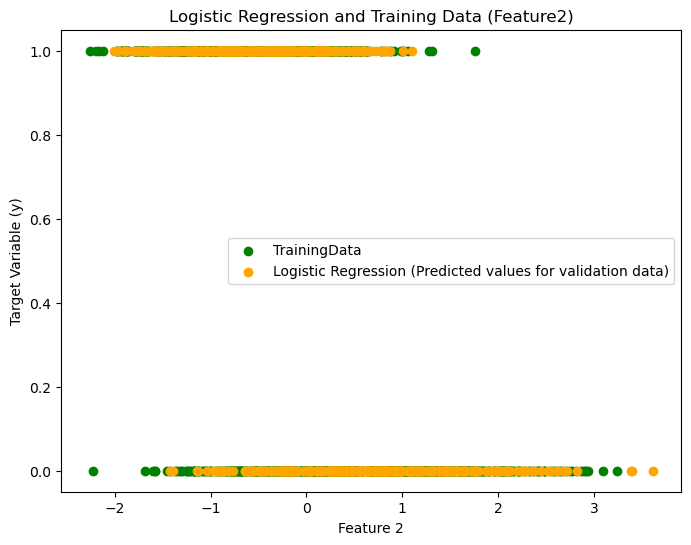

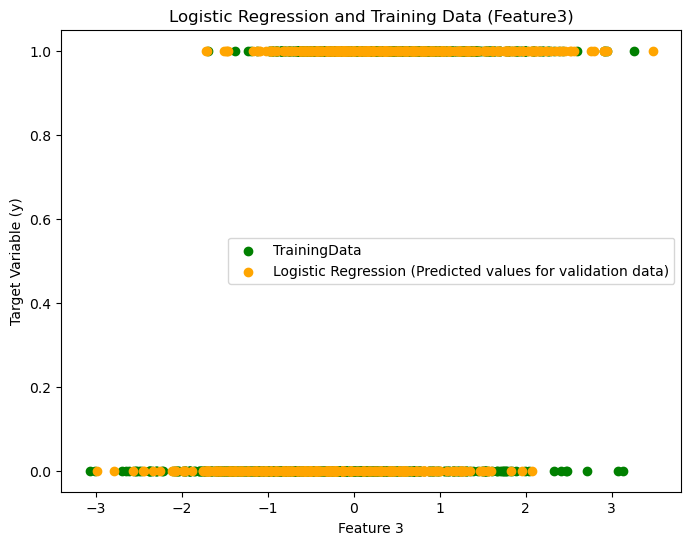

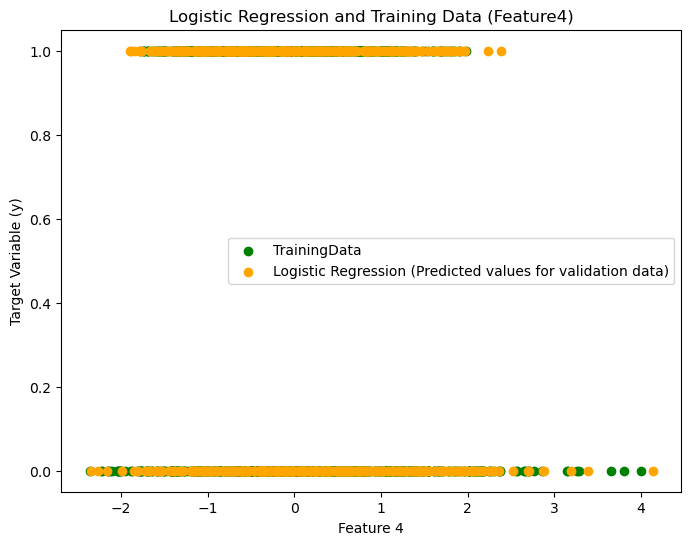

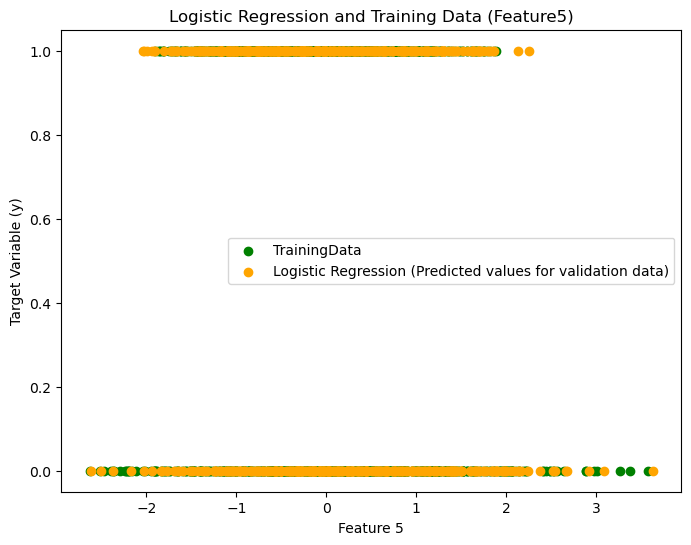

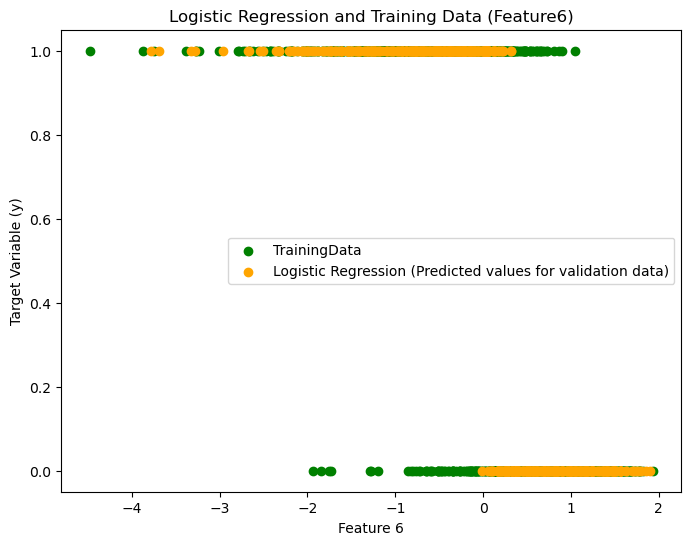

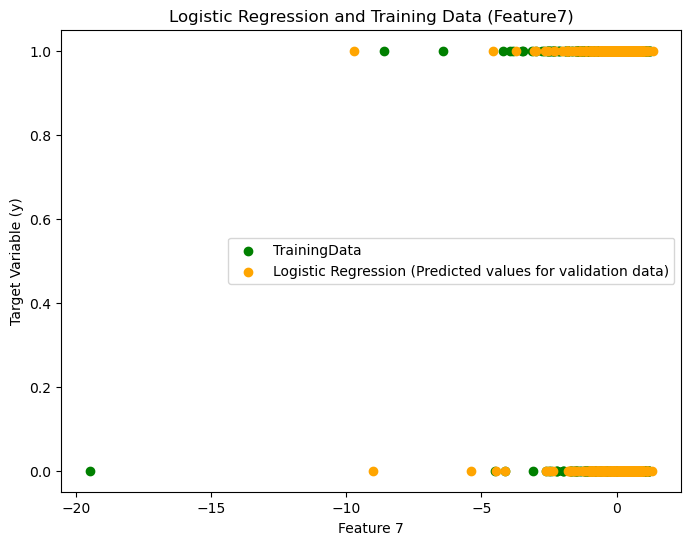

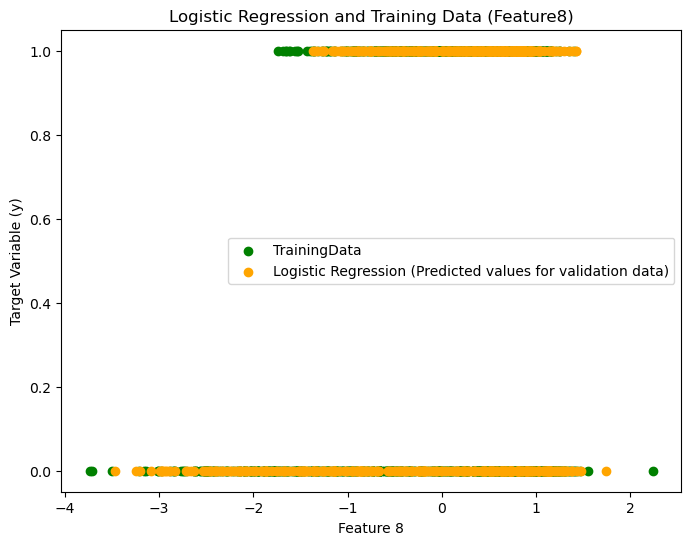

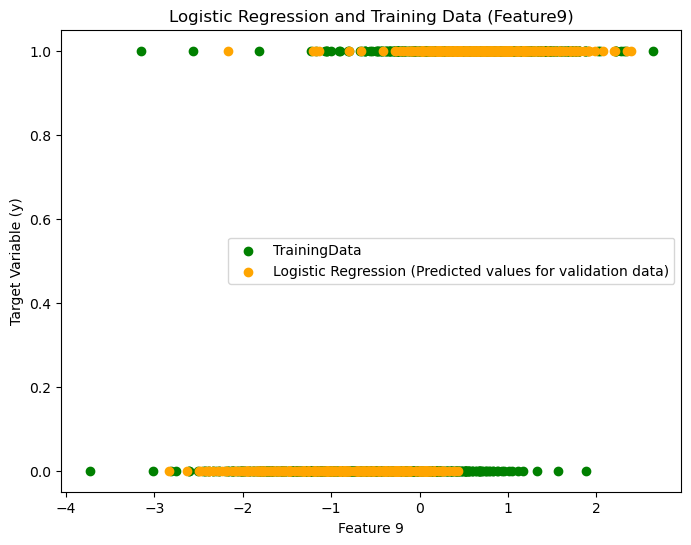

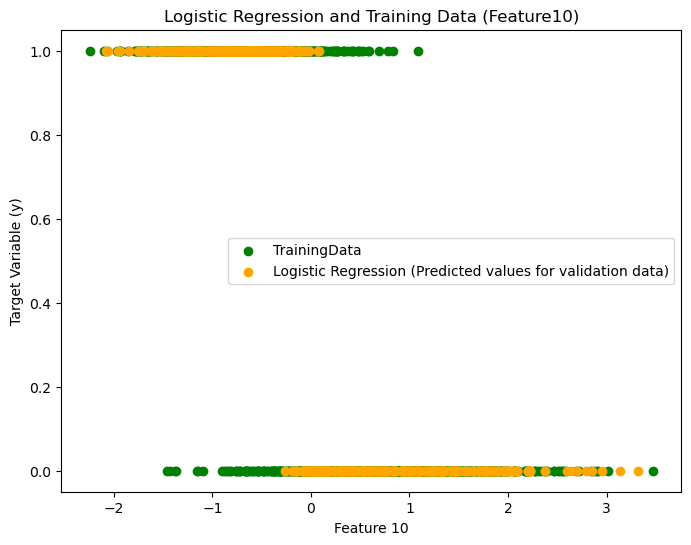

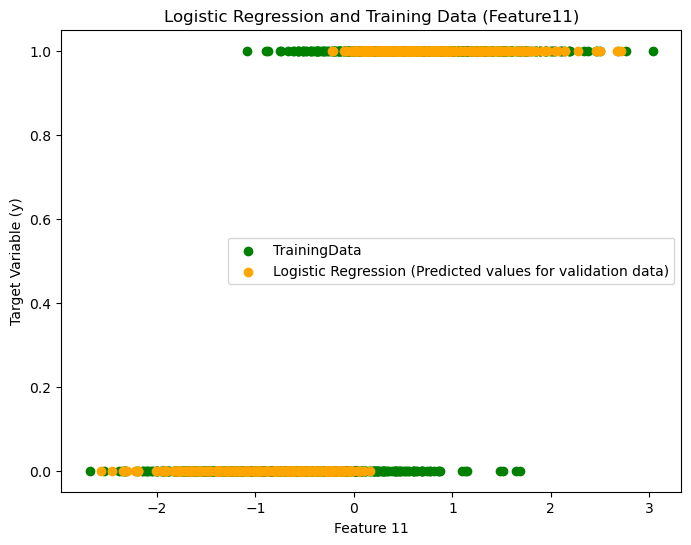

In [13]:
import matplotlib.pyplot as plt

#Plot features
num_features = X_train.shape[1]
for feature_idx in range(num_features):
    plt.figure(figsize=(8, 6))
    plt.scatter (X_train[:, feature_idx], y_train, label='TrainingData', color='green')
    plt.scatter (X_val[:, feature_idx], y_val_pred_class, label='Logistic Regression (Predicted values for validation data)',color='orange')
    plt.xlabel('Feature {}'.format (feature_idx))
    plt.ylabel('Target Variable (y)')
    plt.legend ()
    plt.title('Logistic Regression and Training Data (Feature{})'. format (feature_idx))
    plt.show()